In [400]:
%pip install nbformat
%pip install requests
%pip install configparser
%pip install ipywidgets
%pip install pandas
%pip install matplotlib

In [401]:
%run ./helpers.ipynb
%run ./analytics.ipynb

In [402]:
import ipywidgets as widgets
from IPython.display import display

In [403]:
# Difine some widgets to show config values
host = widgets.Text(description='Host:', value='', disabled=True)
key = widgets.Text(description='Access Key:', value='', disabled=True)
sym = widgets.Text(description='Symbols:', value='', disabled=True)

# Display the widgets
display(host, key, sym)

Text(value='', description='Host:', disabled=True)

Text(value='', description='Access Key:', disabled=True)

Text(value='', description='Symbols:', disabled=True)

In [415]:
# Initialize the logger
logger = get_logger()

# Load configs
config = load_config('../conf/config.ini')

# Get a list of currency symbols from config file
symbols = ['All Currencies'] + dict(config.items('arguments'))['symbols'].split(',')

# Populate the widgets with host & access key info
host.value = dict(config.items('arguments'))['endpoint']
key.value = dict(config.items('arguments'))['access_key']
sym.value = dict(config.items('arguments'))['symbols']

# Get the data from endpoint
data = get_data(build_endpoint(config))

# Create the rates dataframe
rates_df = get_rates_dataframe(data)

In [421]:
# Create interactive widget for selecting symbol
symbol_widget = widgets.Dropdown(
    options=symbols,
    description='Currency:'
)

# Define function to update plot based on selected symbol
def update_plot(symbol):
    stats_df = summarize_exchange_rates(rates_df, symbol if symbol != 'All Currencies' else None)
    display(stats_df)

    graph_exchange_rate_over_time(rates_df, symbol if symbol != 'All Currencies' else None)

In [422]:
# Display the interactive widget
widgets.interact(update_plot, symbol=symbol_widget);

interactive(children=(Dropdown(description='Currency:', options=('All Currencies', 'NZD', 'USD', 'GBP', 'EUR',…

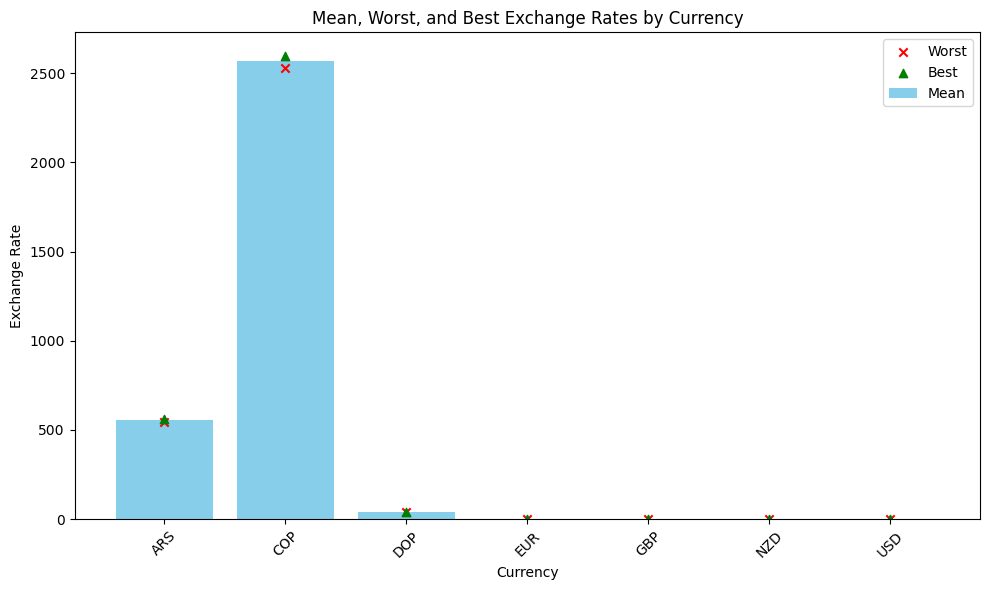

In [408]:
graph_summary_exchange_by_currency(stats_df)